In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas import DatetimeIndex

In [80]:
my_columns = ["Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type",
            "Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price",
            "Stage","Opportunity_ID"]#contexto
df_completo = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_completo[my_columns]

In [81]:
df.describe()


,Opportunity_ID
count,16947.000000
mean,5335.940225
std,3324.723809
min,0.000000
25%,2448.500000
50%,5306.000000
75%,7698.000000
max,12803.000000


In [82]:
#COLUMNA DATE A DATETIME
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], format='%m/%d/%Y')
df["Opportunity_Created_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).day
df["Opportunity_Created_Month"] = DatetimeIndex(df["Opportunity_Created_Date"]).month
df["Opportunity_Created_Year"] = DatetimeIndex(df["Opportunity_Created_Date"]).year
df_won = df[df.Stage=="Closed Won"]
df_lost = df[df.Stage=="Closed Lost"]

df_won.head()

<ipython-input-82-92e4fd968612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], format='%m/%d/%Y')
<ipython-input-82-92e4fd968612>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity_Created_Day"] = DatetimeIndex(df["Opportunity_Created_Date"]).day
<ipython-input-82-92e4fd968612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Stage,Opportunity_ID,Opportunity_Created_Day,Opportunity_Created_Month,Opportunity_Created_Year
1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,Closed Won,1,7,12,2015
2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,Closed Won,2,8,12,2015
7,None,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-09,None,None,None,None,None,Closed Won,7,9,12,2015
23,25,Person_Name_60,Person_Name_49,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-09,None,None,None,None,None,Closed Won,11,9,12,2015
63,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,2015-12-09,None,None,None,None,None,Closed Won,20,9,12,2015


In [83]:
df["Opportunity_Created_Month"].value_counts()

5     1596
10    1580
1     1545
6     1509
12    1508
3     1476
9     1391
4     1384
11    1339
7     1301
2     1272
8     1046
Name: Opportunity_Created_Month, dtype: int64

Oportunidades 'Closed Won' promedio por Account_Owner = 353.0625
Oportunidades 'Closed Won' promedio por Account_Owner = 244.43589743589743
Oportunidades 'Closed Won' promedio por Account_Owner = 153.125


<ipython-input-84-50d1fe9d99a7>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
<ipython-input-84-50d1fe9d99a7>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
<ipython-input-84-50d1fe9d99a7>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')


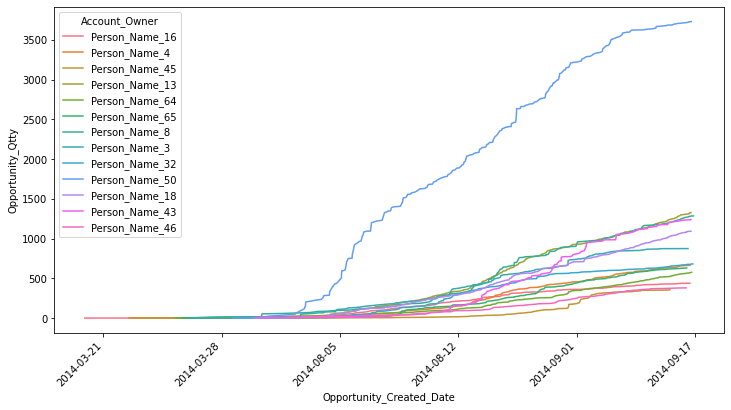

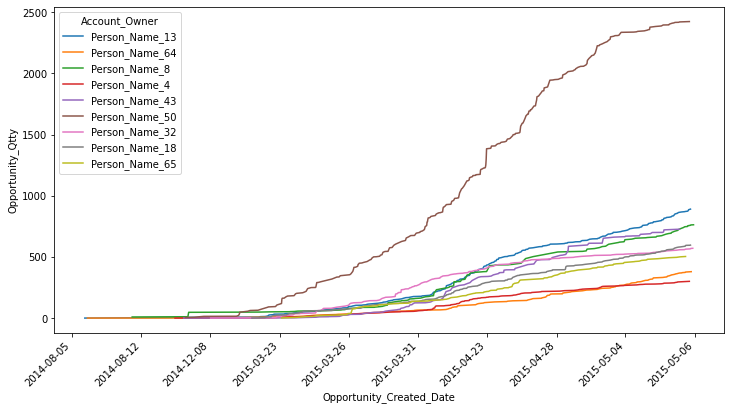

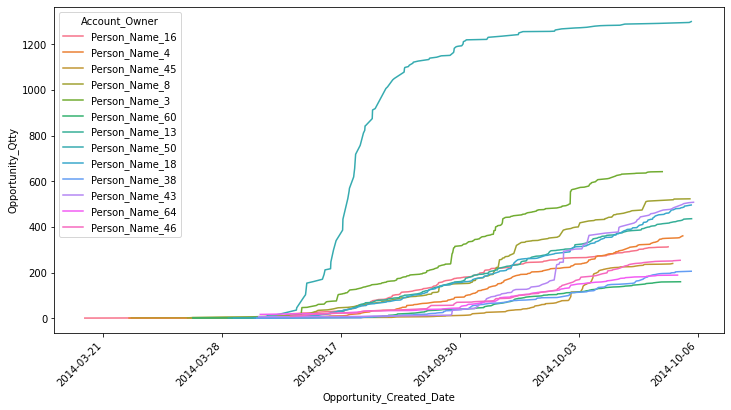

In [84]:
dfs = [df, df_won, df_lost]


for dataframe in dfs: #lo hago en general, ganados y perdidos
    series_won_owners = dataframe.groupby("Account_Owner")["Opportunity_ID"].agg("count")
    prom_won_per_owner = series_won_owners.agg("mean")
    dataframe_owners = series_won_owners.to_frame().reset_index() #NO PUDE HACERLO CON MERGE
    dataframe_owners.columns = ["Account_Owner", "Opportunity_Qtty"]
    print("Oportunidades 'Closed Won' promedio por Account_Owner = "+str(prom_won_per_owner))

    dataframe = pd.merge(dataframe, dataframe_owners, on="Account_Owner",how="inner")
    dataframe["Opportunity_Qtty_Prom"] = prom_won_per_owner

    dataframe_per_account_owners = dataframe[dataframe["Opportunity_Qtty"]>dataframe["Opportunity_Qtty_Prom"]]
    graph_df = dataframe_per_account_owners.groupby(["Opportunity_Created_Date", "Account_Owner"]).agg({"Opportunity_ID":"count"})
    graph_df.columns = ["Opportunity_Qtty"]
    graph_df = graph_df.groupby(["Account_Owner"]).agg({"Opportunity_Qtty":np.cumsum}).reset_index()
    #display(graph_df.loc[1100:1120])

    x_dates = graph_df['Opportunity_Created_Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    fig, ax = plt.subplots(figsize = (12,6))
    fig = sns.lineplot(data=graph_df, x='Opportunity_Created_Date', y='Opportunity_Qtty', hue='Account_Owner', ax=ax)
    ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

Text(0, 0.5, 'Opportunities')

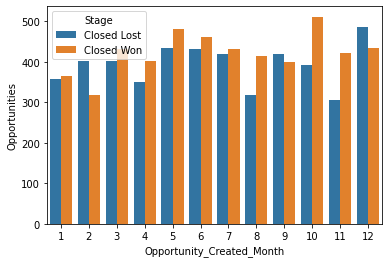

In [88]:
moth_creation = df[(df["Stage"]=="Closed Won") | (df["Stage"]=="Closed Lost")].drop_duplicates(subset=['Opportunity_ID'], keep='last').groupby(["Opportunity_Created_Month","Stage"]).agg({"Opportunity_ID":"count"}).reset_index()
fig = sns.barplot(data=moth_creation,x="Opportunity_Created_Month", y="Opportunity_ID", hue="Stage")
fig.set_ylabel("Opportunities")